<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [295]:
import pandas as pd
import pylab as pl
import numpy as np
#import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [296]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\Compressed\16266142175124433\Project 1 - Covid Vaccination\\country_vaccinations.csv")
# take a look at the dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


## EDA

In [297]:
df.drop(['source_name','source_website'], axis=1, inplace=True)

In [298]:
df.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
25916,Slovakia,SVK,2021-05-21,2251972.0,1527774.0,724198.0,38660.0,35111.0,41.25,27.98,13.26,6431.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
24661,Saudi Arabia,SAU,2021-06-18,16457176.0,NaN,NaN,94278.0,121619.0,47.27,NaN,NaN,3493.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
704,Angola,AGO,2021-05-30,NaN,NaN,NaN,NaN,14408.0,NaN,NaN,NaN,438.0,Oxford/AstraZeneca
28921,Turkey,TUR,2021-06-21,43629179.0,29052236.0,14576943.0,1015801.0,1264431.0,51.73,34.45,17.28,14992.0,"Pfizer/BioNTech, Sinovac"
14756,Kazakhstan,KAZ,2021-02-01,NaN,NaN,NaN,NaN,1273.0,NaN,NaN,NaN,68.0,"QazVac, Sinopharm/HayatVax, Sputnik V"


In [299]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing
31239,Zimbabwe,ZWE,2021-07-15,1666862.0,1036252.0,630610.0,53222.0,33326.0,11.21,6.97,4.24,2242.0,Sinopharm/Beijing


In [300]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [302]:
df.nunique()

country                                  218
iso_code                                 218
date                                     226
total_vaccinations                     16997
people_vaccinated                      15954
people_fully_vaccinated                13072
daily_vaccinations_raw                 12463
daily_vaccinations                     17641
total_vaccinations_per_hundred          6967
people_vaccinated_per_hundred           5431
people_fully_vaccinated_per_hundred     3943
daily_vaccinations_per_million          9400
vaccines                                  53
dtype: int64

In [303]:
df.vaccines.value_counts()

vaccines
Oxford/AstraZeneca                                                                             4805
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  4118
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2588
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2368
Oxford/AstraZeneca, Pfizer/BioNTech                                                            2058
Moderna, Pfizer/BioNTech                                                                       1480
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1447
Pfizer/BioNTech                                                                                1155
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1029
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                    

In [304]:
df.groupby("country")["total_vaccinations"].mean().sort_values(ascending= False).head()

country
China             5.392210e+08
United States     1.738476e+08
India             1.288080e+08
United Kingdom    4.107739e+07
Brazil            3.809265e+07
Name: total_vaccinations, dtype: float64

In [305]:
cdf = df[['country',"vaccines",'date', "total_vaccinations"]]
cdf.head()

,country,vaccines,date,total_vaccinations
0,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-02-22,0.0
1,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-02-23,NaN
2,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-02-24,NaN
3,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-02-25,NaN
4,Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-02-26,NaN


In [306]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
dtype: object

In [307]:
#df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
#df.dtypes


## Data Preprocessing

In [308]:
objList = df.select_dtypes(include = "object").columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

df.dtypes



country                                  int32
iso_code                                 int32
date                                     int32
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                 int32
dtype: object

In [326]:
df.fillna(value=0, inplace=True)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,1,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
1,0,1,83,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,17
2,0,1,84,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,17
3,0,1,85,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,17
4,0,1,86,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,17


In [351]:
x=df.iloc[:,[2,5,7,8,10,12]].astype('int')
y=df.iloc[:,3].astype('int')


In [352]:
df.dtypes

country                                  int32
iso_code                                 int32
date                                     int32
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                 int32
dtype: object

In [353]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.16532477, -0.17390375, -0.13524559, -0.53962362, -0.43528674,
        -0.92332113],
       [-1.14589105, -0.17390375, -0.13362236, -0.53962362, -0.43528674,
        -0.92332113],
       [-1.12645733, -0.17390375, -0.13362236, -0.53962362, -0.43528674,
        -0.92332113],
       ...,
       [ 1.57483014, -0.09979186, -0.10251154, -0.20439835, -0.10368014,
         1.86462878],
       [ 1.59426386, -0.09919275, -0.09879367, -0.20439835, -0.10368014,
         1.86462878],
       [ 1.61369758, -0.09850936, -0.09567309, -0.17087582, -0.10368014,
         1.86462878]])

## Strorytelling - Visualization

## Prepare Data for Machine learning

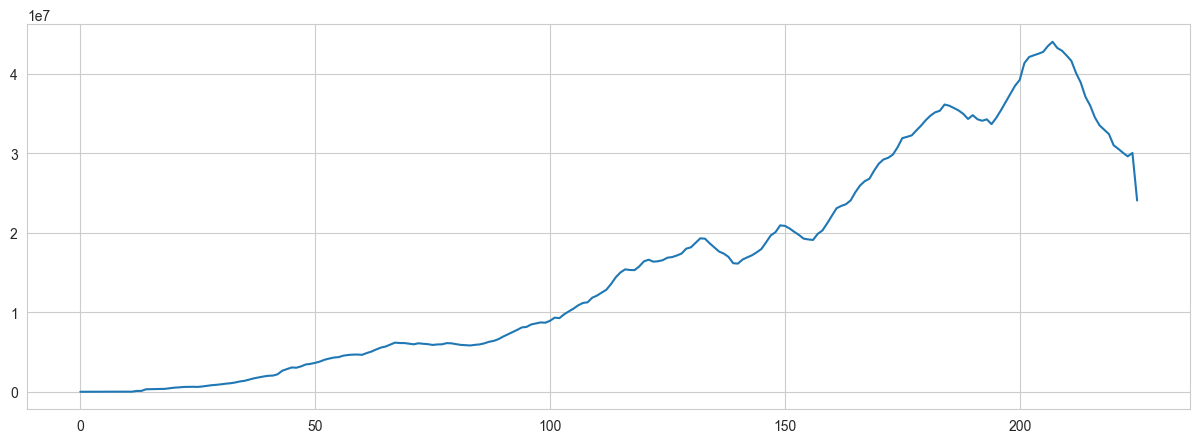

In [313]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.figure(figsize= (15,5))
sns.lineplot(x.values)
plt.show()


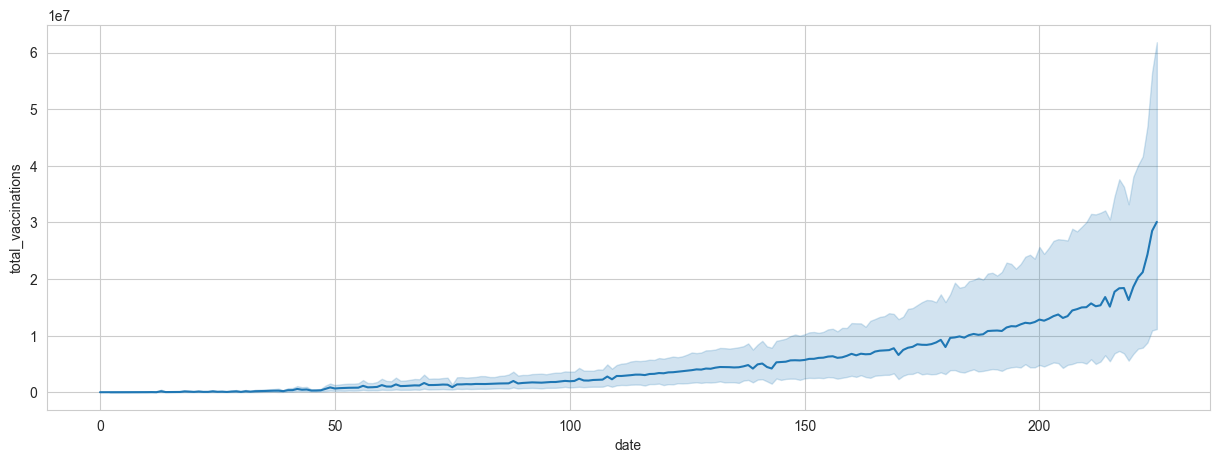

In [314]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.show()

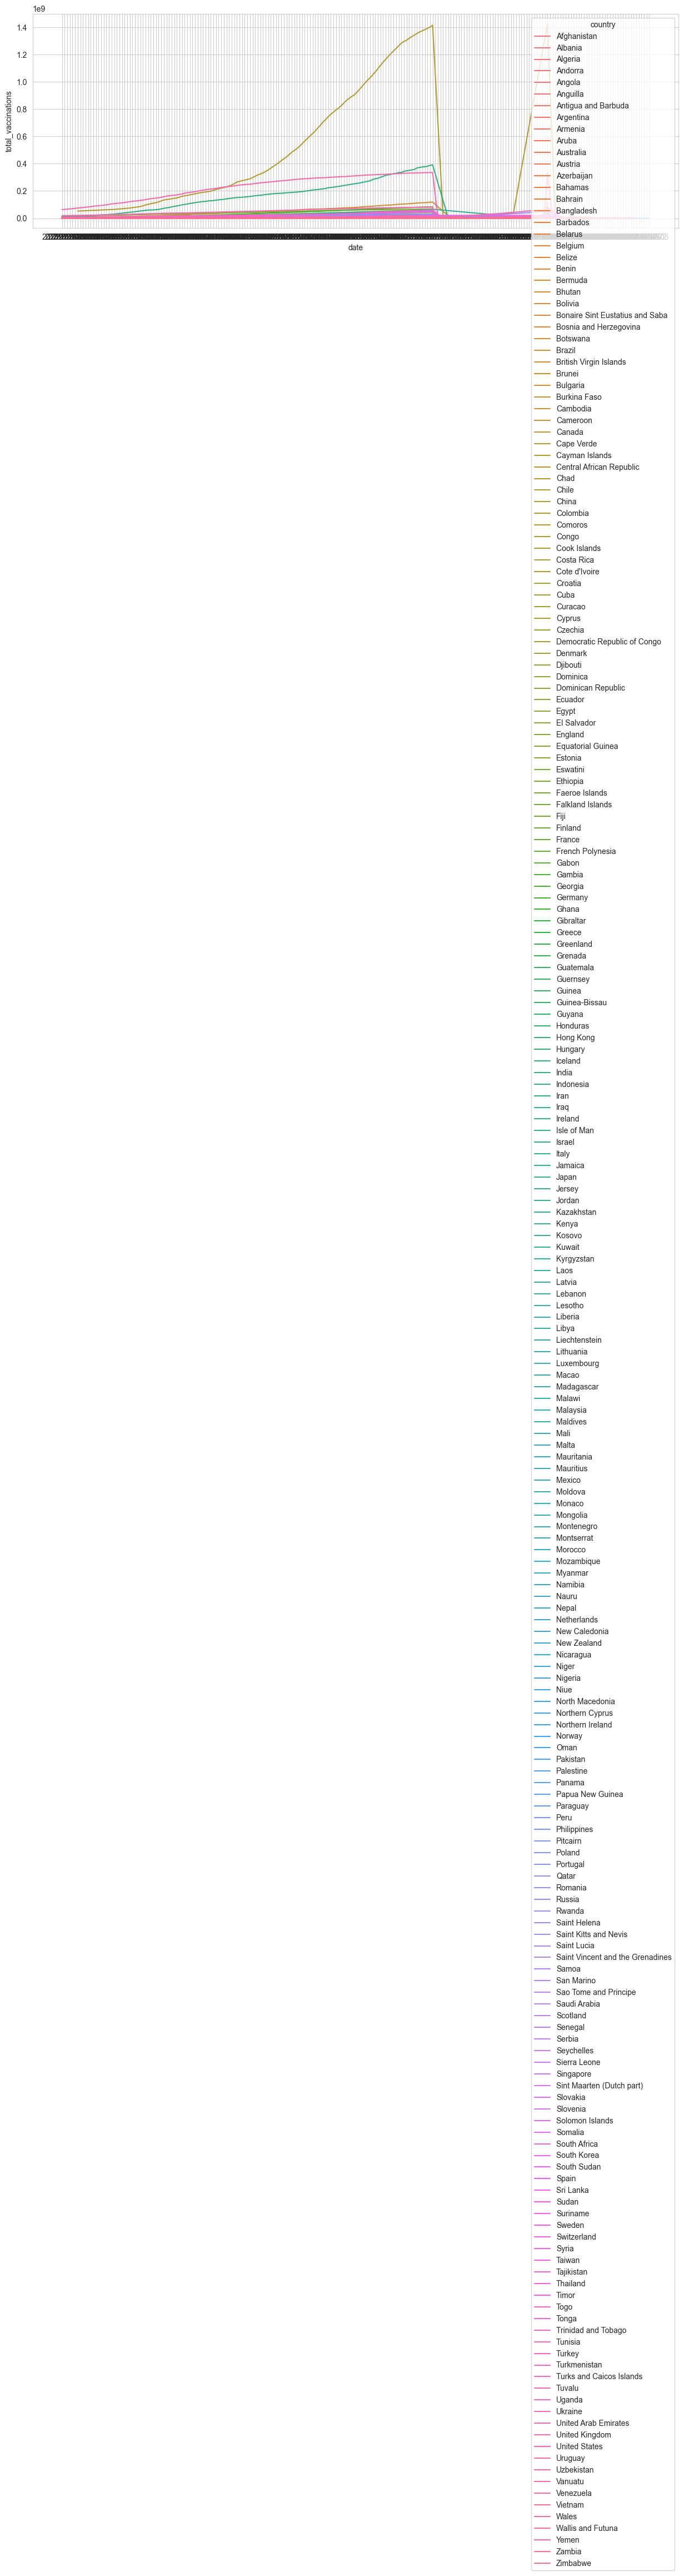

In [261]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y="total_vaccinations" ,data= cdf,hue= "country")
plt.show()

## Train your model

In [354]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24992, 6)
(24992,)
(6248, 6)
(6248,)


In [356]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

MemoryError: Unable to allocate 2.53 GiB for an array with shape (24992, 13600) and data type float64

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_pred ,pos_label=0)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

In [ ]:
 y_pred = clf.predict(x_test)
    
    

## Test the model and show the metrics

## Save your final model

## Send us the Result (Maktabkhoone)